In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the datasets
male_players = pd.read_csv('male_players.csv.zip')
female_players = pd.read_csv('female_players.csv.zip')

C:\Users\vinht\AppData\Local\Temp\ipykernel_20644\3566476423.py:13: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players = pd.read_csv('male_players.csv.zip')


In [4]:
# Data Cleaning and Concatenation
critical_columns = ['value_eur', 'wage_eur', 'club_team_id', 'club_name', 'league_id', 'league_name', 
                    'league_level', 'club_position', 'club_jersey_number', 'club_joined_date', 
                    'club_contract_valid_until_year', 'release_clause_eur', 'nation_team_id', 
                    'nation_position', 'nation_jersey_number']
for col in critical_columns:
    male_players[col].fillna(method='ffill', inplace=True)
    female_players[col].fillna(method='ffill', inplace=True)

male_players['player_tags'].fillna('', inplace=True)
female_players['player_tags'].fillna('', inplace=True)
male_players['player_traits'].fillna('', inplace=True)
female_players['player_traits'].fillna('', inplace=True)

columns_to_drop = ['club_loaned_from', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'goalkeeping_speed']
male_players.drop(columns=columns_to_drop, inplace=True)
female_players.drop(columns=columns_to_drop, inplace=True)

players = pd.concat([male_players, female_players], ignore_index=True)

C:\Users\vinht\AppData\Local\Temp\ipykernel_20644\1608279289.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  male_players[col].fillna(method='ffill', inplace=True)
C:\Users\vinht\AppData\Local\Temp\ipykernel_20644\1608279289.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  male_players[col].fillna(method='ffill', inplace=True)
C:\Users\vinht\AppData\Local\Temp\ipykernel_20644\1608279289.py:8: FutureWarning: A value is trying to be s

In [5]:
# Investigating the Data
position_mapping = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CM': 'Midfielder', 'CAM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
players['primary_position'] = players['player_positions'].apply(lambda x: position_mapping.get(x.split(',')[0], 'Other'))
players = players[players['primary_position'] != 'Other']

# Feature Selection/Engineering
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = players[features]
y = players['primary_position']
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\vinht\AppData\Local\Temp\ipykernel_20644\2030982928.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [6]:
# Model Selection and Training
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

# Support Vector Machine with Linear Kernel
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM (Linear Kernel) Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

KNN Accuracy: 0.858208148708527
              precision    recall  f1-score   support

    Defender       0.89      0.89      0.89     12163
     Forward       0.85      0.79      0.82      7195
  Goalkeeper       1.00      1.00      1.00      4182
  Midfielder       0.80      0.82      0.81     13472

    accuracy                           0.86     37012
   macro avg       0.88      0.88      0.88     37012
weighted avg       0.86      0.86      0.86     37012

Logistic Regression Accuracy: 0.7331135847833136
              precision    recall  f1-score   support

    Defender       0.86      0.90      0.88     12163
     Forward       0.83      0.83      0.83      7195
  Goalkeeper       0.00      0.00      0.00      4182
  Midfielder       0.61      0.76      0.68     13472

    accuracy                           0.73     37012
   macro avg       0.57      0.62      0.60     37012
weighted avg       0.67      0.73      0.70     37012

SVM (Linear Kernel) Accuracy: 0.7442721279585


E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Defender       0.88      0.89      0.88     12163
     Forward       0.86      0.80      0.83      7195
  Goalkeeper       0.00      0.00      0.00      4182
  Midfielder       0.61      0.82      0.70     13472

    accuracy                           0.74     37012
   macro avg       0.59      0.63      0.60     37012
weighted avg       0.68      0.74      0.71     37012



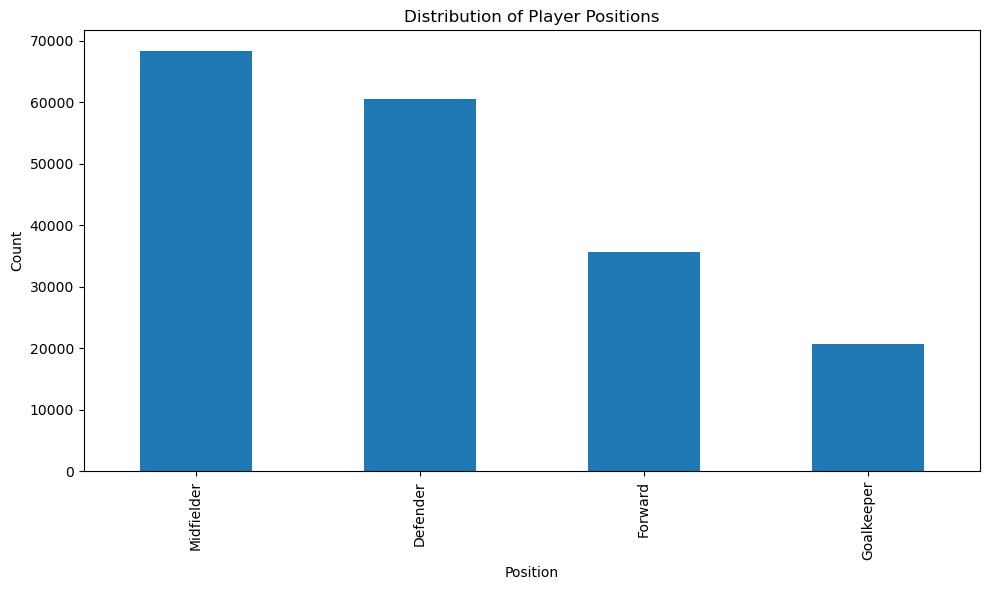

In [7]:
# Visualization 1: Bar Plot for Distribution of Player Positions
plt.figure(figsize=(10, 6))
players['primary_position'].value_counts().plot(kind='bar')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

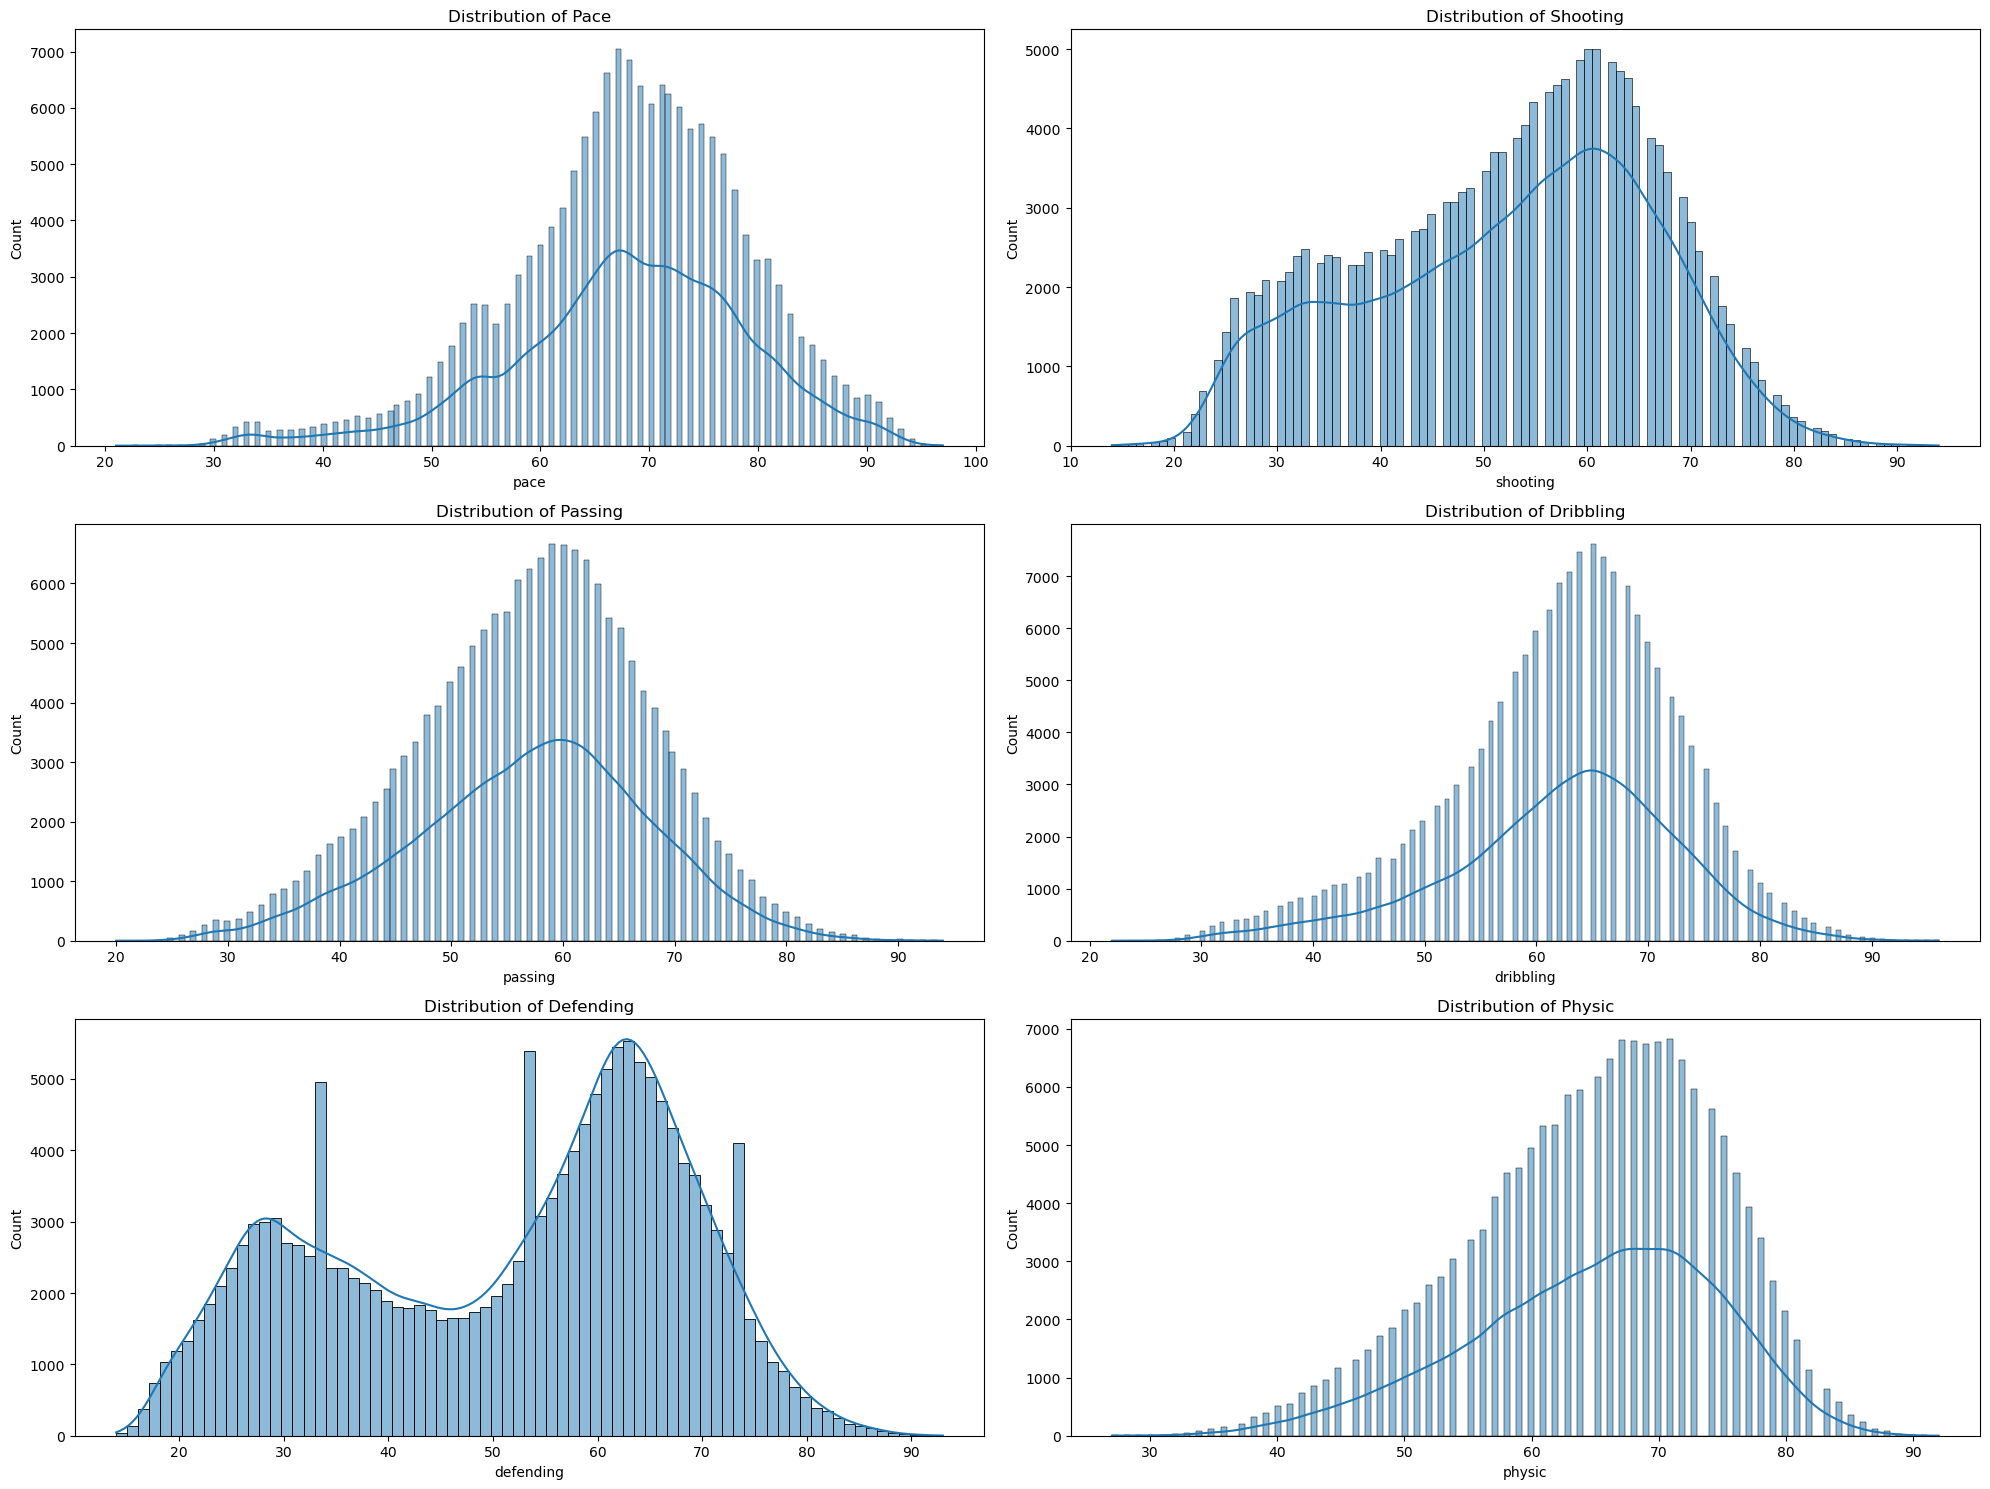

In [8]:
# Visualization 2: Feature Distributions
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(players[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
plt.tight_layout()
plt.show()

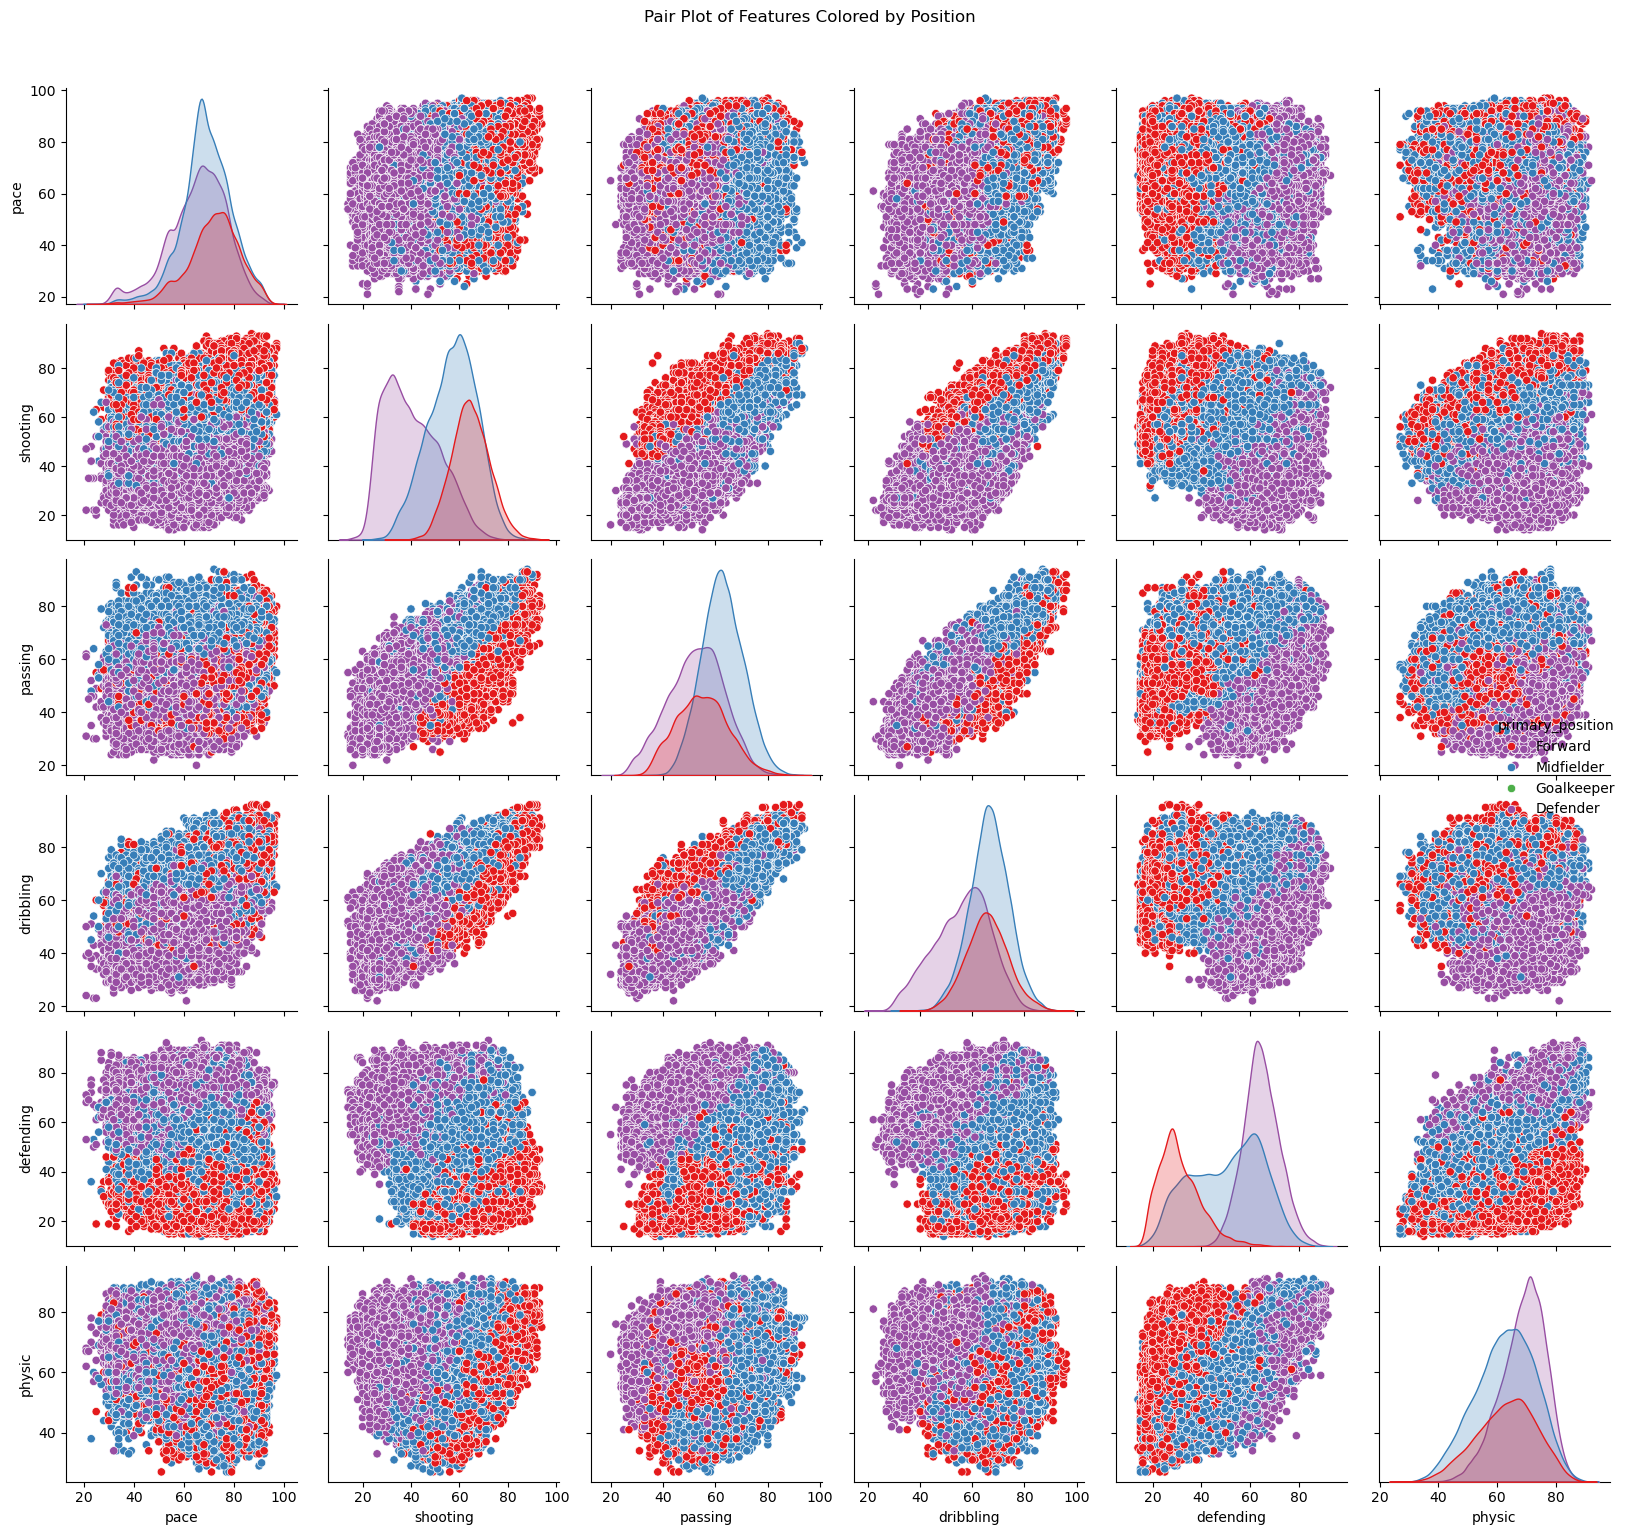

In [9]:
# Visualization 3: Pair Plot of Features Colored by Position
sns.pairplot(players, vars=features, hue='primary_position', palette='Set1')
plt.suptitle('Pair Plot of Features Colored by Position', y=1.02)
plt.tight_layout()
plt.show()

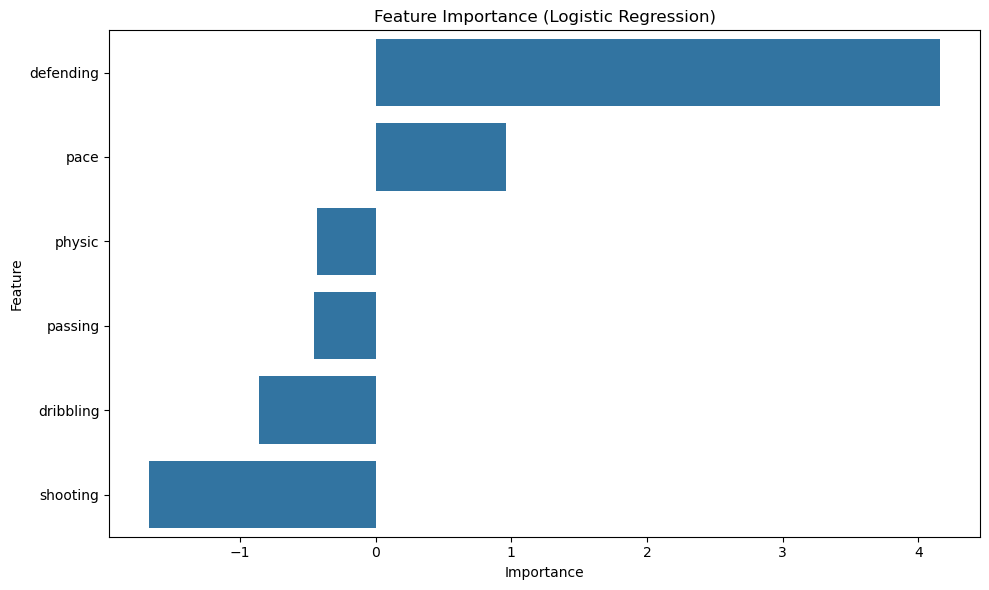

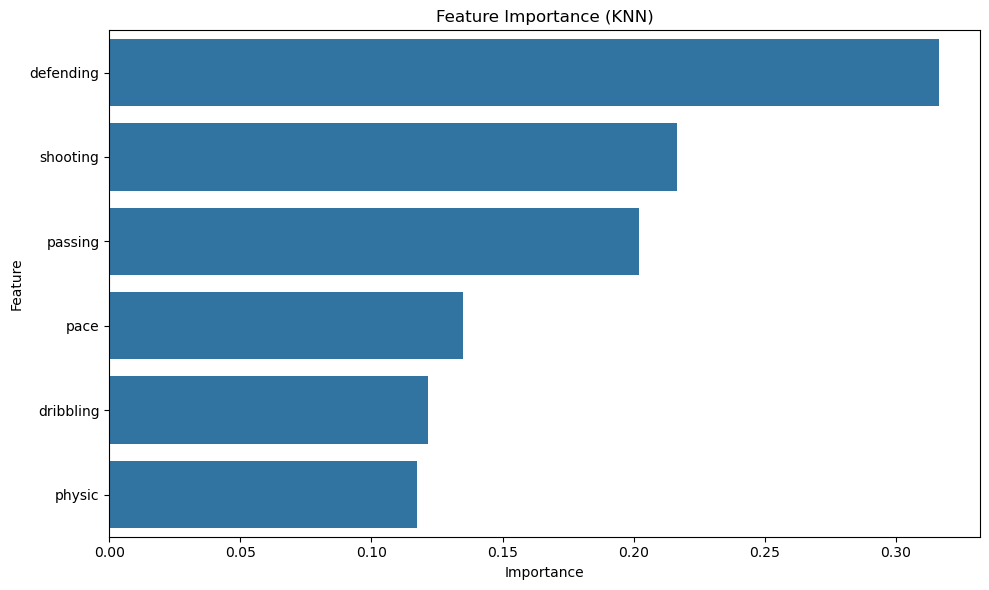

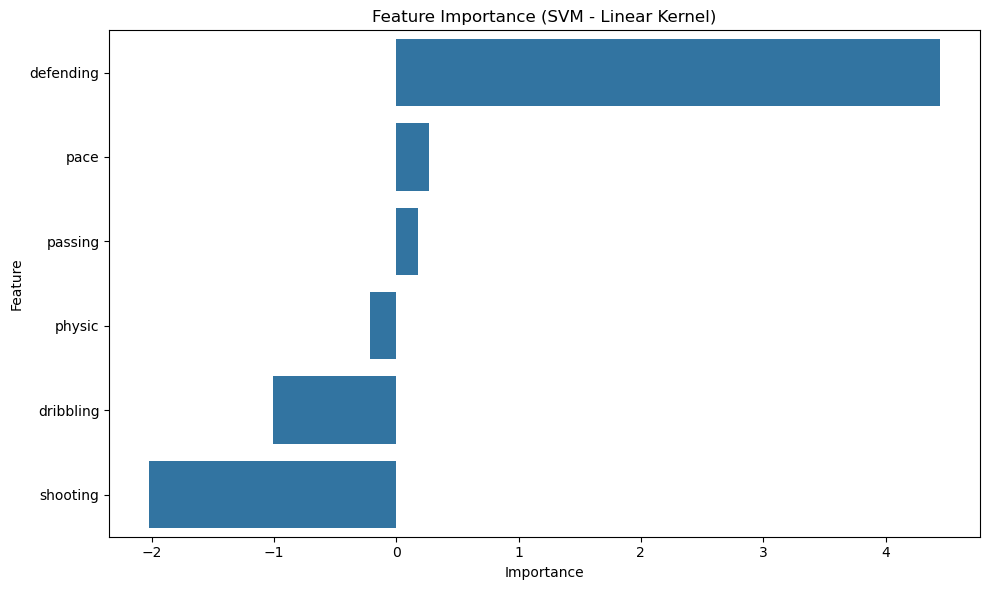

In [13]:
# Visualization 4: Feature Importance Chart (Logistic Regression)
log_reg_importance = pd.DataFrame({'Feature': features, 'Importance': log_reg.coef_[0]})
log_reg_importance = log_reg_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=log_reg_importance)
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()

# Feature Importance for KNN using Permutation Importance
from sklearn.inspection import permutation_importance
knn_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
knn_importance_df = pd.DataFrame({'Feature': features, 'Importance': knn_importance.importances_mean})
knn_importance_df = knn_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_importance_df)
plt.title('Feature Importance (KNN)')
plt.tight_layout()
plt.show()

# Feature Importance for SVM (Linear Kernel)
svm_importance = pd.DataFrame({'Feature': features, 'Importance': svm.coef_[0]})
svm_importance = svm_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=svm_importance)
plt.title('Feature Importance (SVM - Linear Kernel)')
plt.tight_layout()
plt.show()

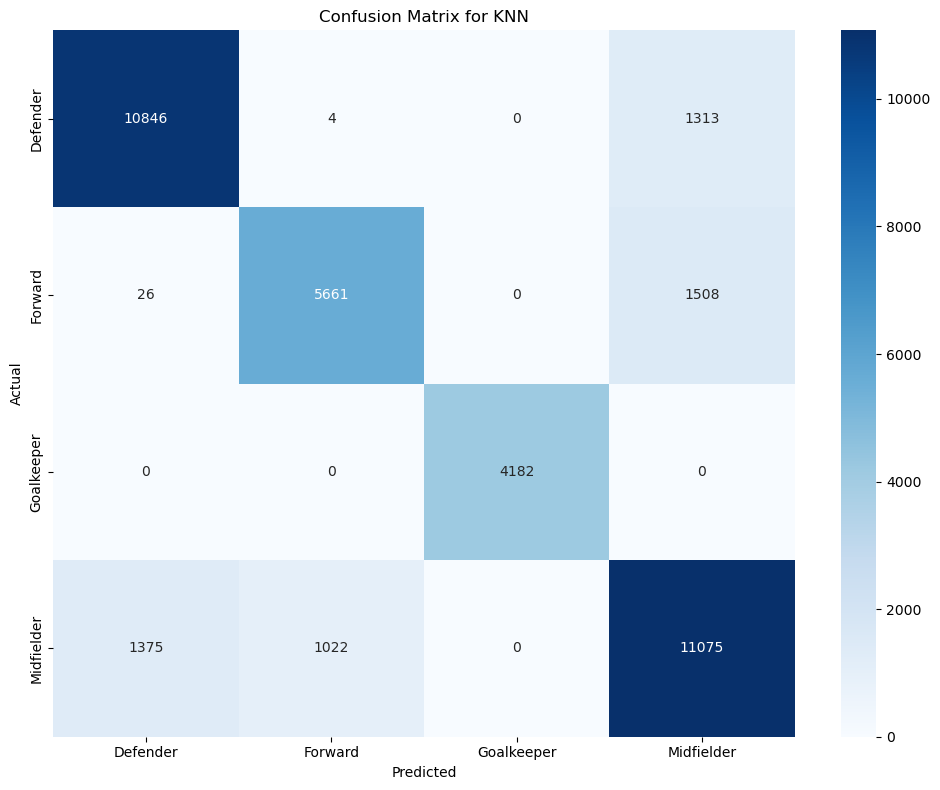

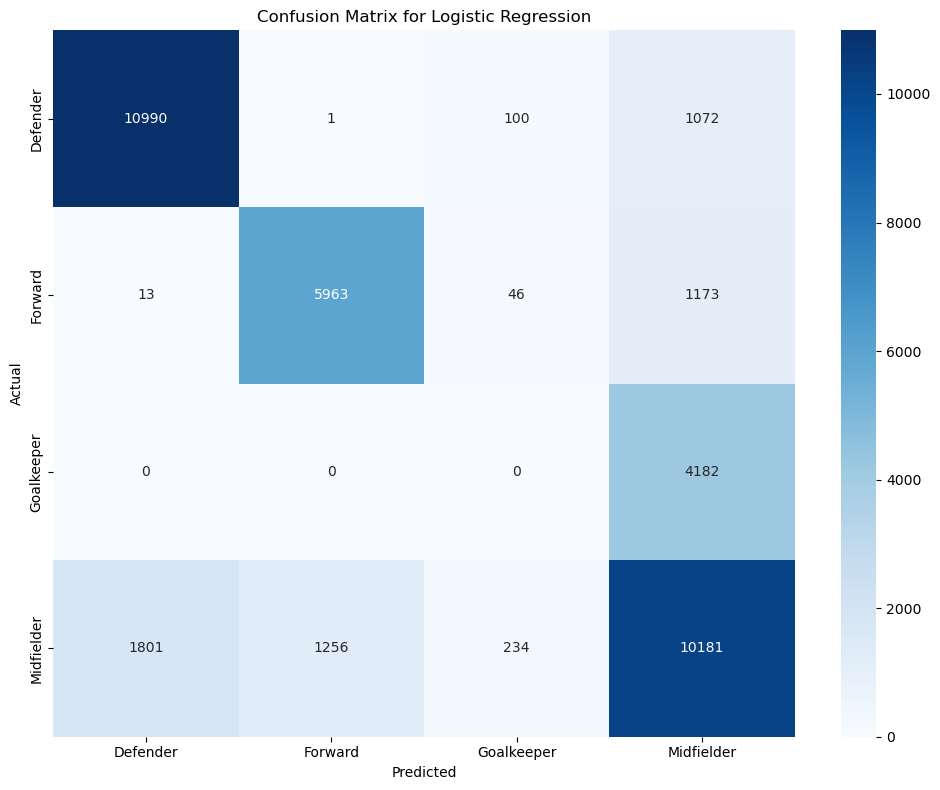

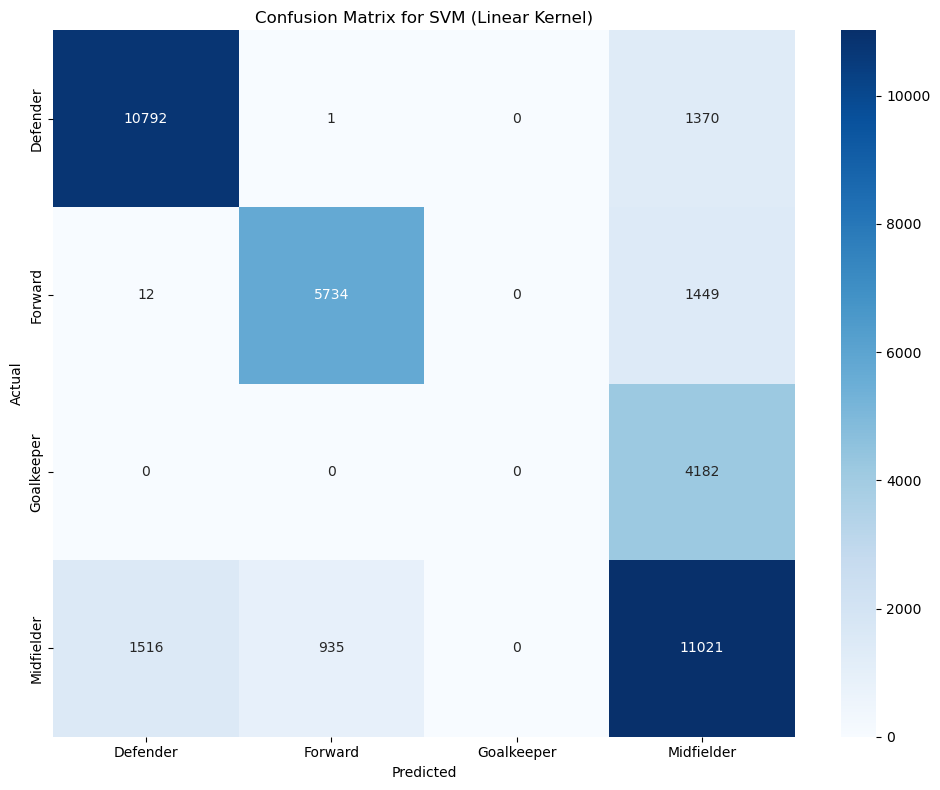

In [15]:
# Visualization 5: Confusion Matrix for KNN
plt.figure(figsize=(10, 8))
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Visualization 6: Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
conf_matrix_log_reg = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Visualization 7: Confusion Matrix for SVM (Linear Kernel)
plt.figure(figsize=(10, 8))
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Confusion Matrix for SVM (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

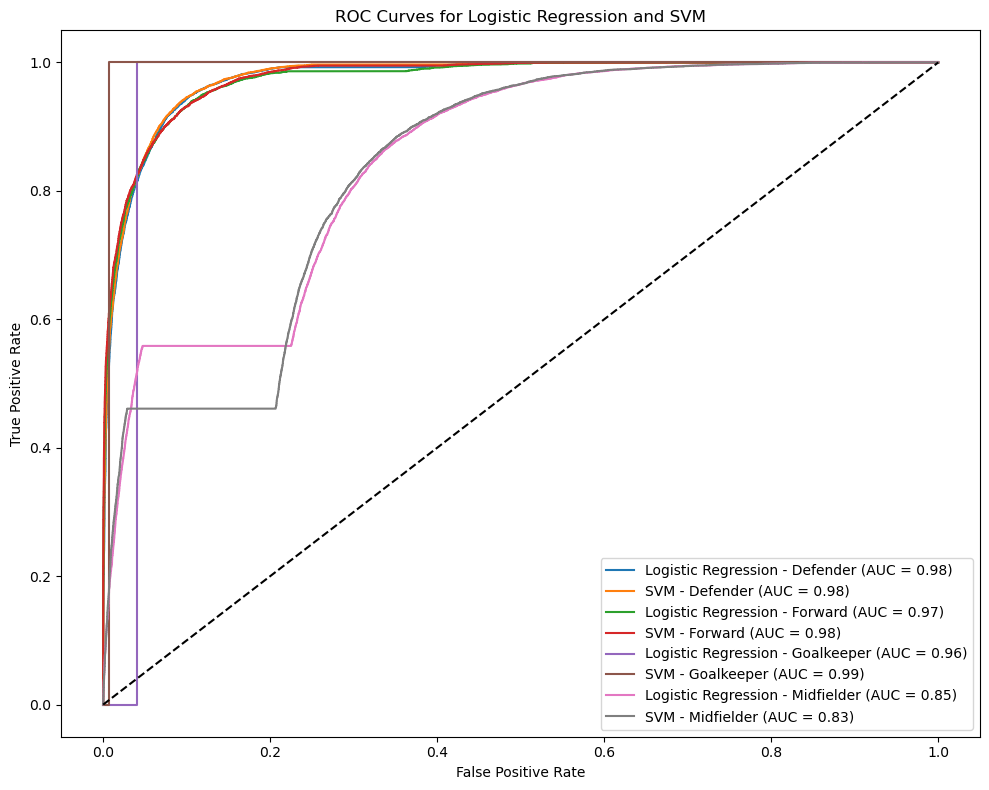

In [16]:
# Visualization 8: ROC Curves for Logistic Regression and SVM
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')

y_test_binary = pd.get_dummies(y_test)
plt.figure(figsize=(10, 8))

for position in y_test_binary.columns:
    plot_roc_curve(y_test_binary[position], log_reg.predict_proba(X_test)[:, y_test_binary.columns.get_loc(position)], f'Logistic Regression - {position}')
    plot_roc_curve(y_test_binary[position], svm.predict_proba(X_test)[:, y_test_binary.columns.get_loc(position)], f'SVM - {position}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression and SVM')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()